# House Price Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
d = pd.read_csv('dataset.csv')
d.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
d.shape

(21613, 21)

In [4]:
d.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Visualization

c:\users\kapis\pycharmprojects\python\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

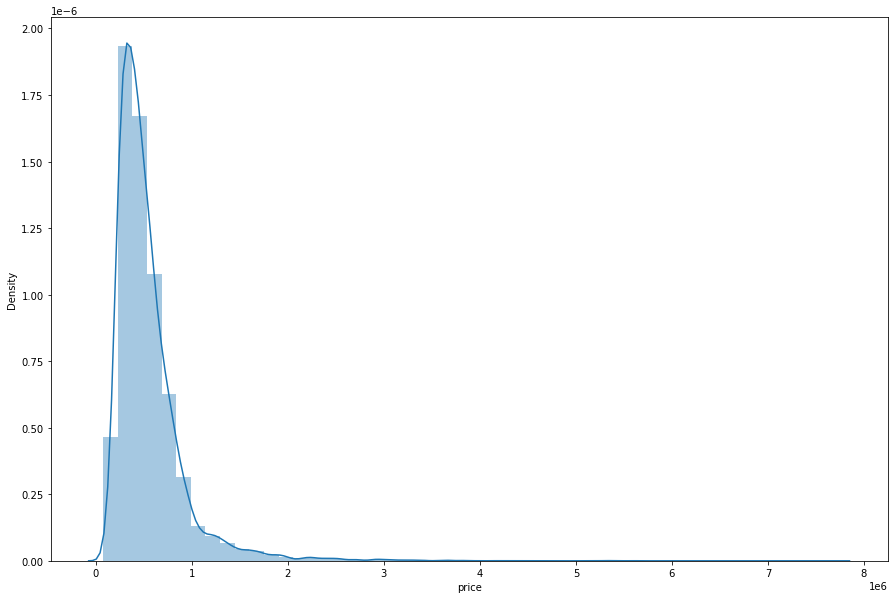

In [5]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(d['price'])

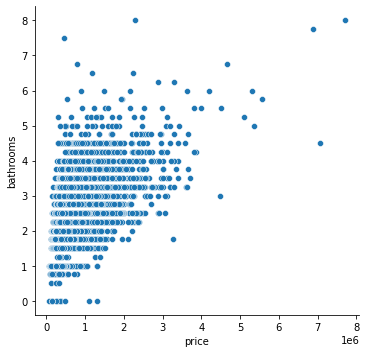

In [6]:
sns.relplot(x='price' ,y='bathrooms' ,data=d)

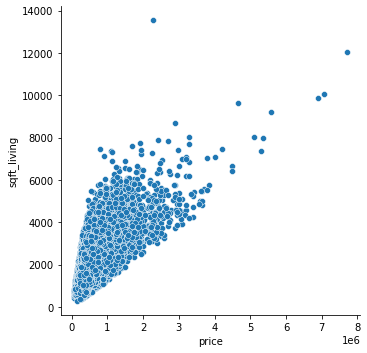

In [7]:
sns.relplot(x='price' ,y='sqft_living' ,data=d)

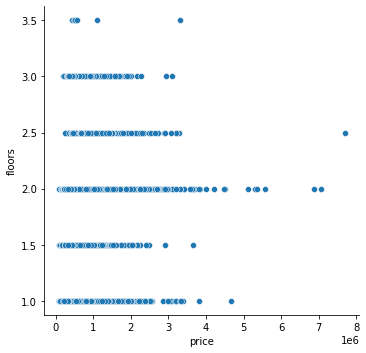

In [8]:
sns.relplot(x='price' ,y='floors' ,data=d)

Text(0, 0.5, 'Count')

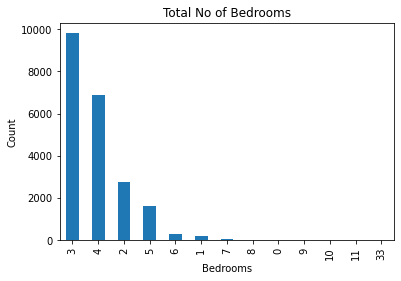

In [9]:
d['bedrooms'].value_counts().plot(kind='bar')
plt.title('Total No of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')

## Modeling

In [10]:
X = d[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15']].values
y = d['price'].values

In [11]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [12]:
reg = LinearRegression()

In [13]:
reg.fit(X_train , y_train)

LinearRegression()

In [14]:
#retrieve the intercept
print(reg.intercept_)

#retrieving the slope:
print(reg.coef_)

7726248.15188377
[-3.59678558e+04  3.98107855e+04  1.13315005e+02  9.72319678e-02
  9.17165471e+03  5.72806911e+05  5.15223111e+04  2.69867684e+04
  9.38983746e+04  7.01584030e+01  4.31566012e+01 -2.59846809e+03
  2.36569924e+01 -5.97926288e+02  6.08814891e+05 -2.16057115e+05
  2.12062598e+01 -3.34013558e-01]


In [15]:
y_pred = reg.predict(X_test)
y_pred

array([ 714313.29153163, 1422462.39996533,  419806.56361416, ...,
        522114.84515205,  174723.95094908,  260992.92524137])

In [16]:
d = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
d

,Actual,Predicted
0,735000.0,7.143133e+05
1,1150000.0,1.422462e+06
2,350500.0,4.198066e+05
3,860000.0,1.288337e+06
4,122000.0,-3.394489e+04
...,...,...
4318,338000.0,4.023099e+05
4319,263000.0,2.421074e+05
4320,397450.0,5.221148e+05
4321,375000.0,1.747240e+05


In [17]:
df1 = d.head(25)
df1.lot(kind='bar',figsize=(16,10))


plt.grid(which='major', linestyle='-', linewidth='0.5',color='green')       
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')

plt.show()

NameError: name 'df' is not defined

In [ ]:
reg.score(X_test , y_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

val = metrics.mean_squared_error(y_test, y_pred)

print('Mean Squared Error:',val)  
print('Root Mean Squared Error:', np.sqrt(val))